In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Selecting model style.
plt.style.use("seaborn")

# Data Collection

In [2]:
#Load the data into dataframe.
df = pd.read_csv("audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# Data description:

* Model     : Audi model.
* Year      : Registraion year.
* Price     : Price in Euros.
* Transmission: Type of gear box.
* Mileage   : Distance used.
* FuelType  : Engine fuel.
* Tax       : Road tax.
* Mpg       : Miles per galoon.
* EngineSize: Size in litres.

In [3]:
#Having a look at shape of dataset.
df.shape

(10668, 9)

In [4]:
#Having a look at datatype of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
#Having a look at missing values.
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
#Having look at the aggregation on numeric data.
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Data Cleaning

In [7]:
#Having a look at not numeric columns.
for label,content in df.items():
    
    if not pd.api.types.is_numeric_dtype(content):
        
        print(label)

model
transmission
fuelType


In [8]:
#converting non-numeric values into numeric.
for label,content in df.items():
    
    if not pd.api.types.is_numeric_dtype(content):
        
        df[label] = pd.Categorical(content).codes +1

In [9]:
#Having a look at datatype of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  int8   
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  int8   
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  int8   
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), int8(3)
memory usage: 531.4 KB


* As we can see all columns are now converted into numeric.

# Data Interpretation and Visualization

In [10]:
#Having look at dataset.
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2017,12500,2,15735,3,150,55.4,1.4
1,6,2016,16500,1,36203,1,20,64.2,2.0
2,1,2016,11000,2,29946,3,30,55.4,1.4
3,4,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,2,1998,3,145,49.6,1.0


In [11]:
#Let's see in which year we get highest sales.
year_count = df['year'].value_counts()
year_count.head()

2019    3197
2016    1964
2017    1935
2015     999
2018     864
Name: year, dtype: int64

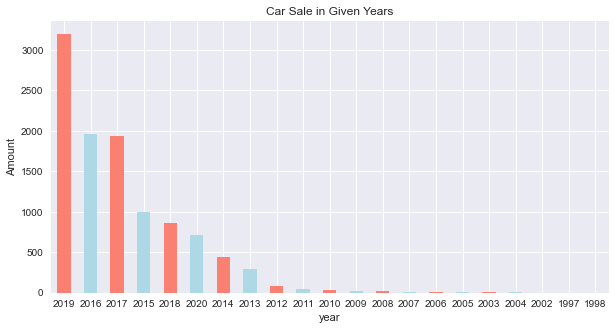

In [12]:
#Visualization
year_count.plot(kind = "bar",figsize = (10,5), color = ["salmon","lightblue"])
plt.title("Car Sale in Given Years")
plt.xlabel("year")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

* This graph describes in 2019 we get the highest sales.

In [13]:
#Having a look at value count of model types.
model_count = df['model'].value_counts()
model_count.head()

3     1929
10    1417
4     1381
1     1347
5      882
Name: model, dtype: int64

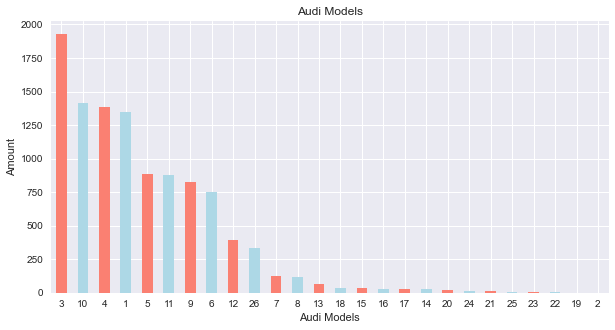

In [14]:
#Visualization
model_count.plot(kind = "bar",figsize = (10,5), color = ["salmon","lightblue"])
plt.title("Audi Models")
plt.xlabel("Audi Models")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

* This graph describes the Audi Model A3 is sold the most.

In [15]:
#Having look at dataset.
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2017,12500,2,15735,3,150,55.4,1.4
1,6,2016,16500,1,36203,1,20,64.2,2.0
2,1,2016,11000,2,29946,3,30,55.4,1.4
3,4,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,2,1998,3,145,49.6,1.0


In [16]:
#Having look at the relation between transmission and fuelType columns. 
crosstab = pd.crosstab(df["transmission"],df["fuelType"])
crosstab

fuelType,1,2,3
transmission,,,
1,1666,12,1030
2,2119,0,2250
3,1792,16,1783


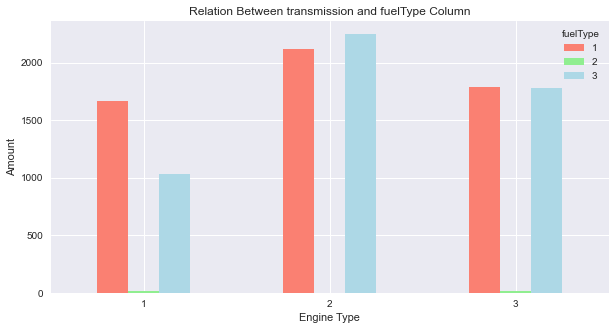

In [17]:
#Visualization
crosstab.plot(kind = "bar",figsize = (10,5), color = ["salmon","lightGreen","lightblue",])
plt.title("Relation Between transmission and fuelType Column")
plt.xlabel("Engine Type")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

* This graph states manual Audi cars give use most profit as compared to automatic and semi-auto Audi cars.

In [18]:
#Having a look at dataset.
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2017,12500,2,15735,3,150,55.4,1.4
1,6,2016,16500,1,36203,1,20,64.2,2.0
2,1,2016,11000,2,29946,3,30,55.4,1.4
3,4,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,2,1998,3,145,49.6,1.0


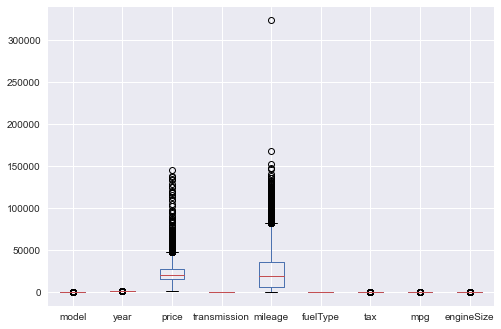

In [19]:
#Having look at the Outliers.
df.boxplot();

* As we can see outliers are present in our dataset.

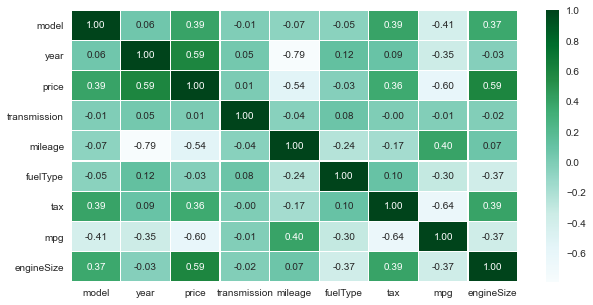

In [20]:
#Visualization correlation metrix.
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = "0.2",
            fmt = "0.2f",
            cmap = "BuGn");

* As we can see model, price, and tax columns give use the high correlation as compared to other columns.

# Prapare the data for modeling.

In [21]:
#Having a look at dataset.
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2017,12500,2,15735,3,150,55.4,1.4
1,6,2016,16500,1,36203,1,20,64.2,2.0
2,1,2016,11000,2,29946,3,30,55.4,1.4
3,4,2017,16800,1,25952,1,145,67.3,2.0
4,3,2019,17300,2,1998,3,145,49.6,1.0


In [22]:
x = df.drop("price" , axis = 1)
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2017,2,15735,3,150,55.4,1.4
1,6,2016,1,36203,1,20,64.2,2.0
2,1,2016,2,29946,3,30,55.4,1.4
3,4,2017,1,25952,1,145,67.3,2.0
4,3,2019,2,1998,3,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,3,2020,2,4018,3,145,49.6,1.0
10664,3,2020,2,1978,3,150,49.6,1.0
10665,3,2020,2,609,3,150,49.6,1.0
10666,10,2017,1,8646,3,150,47.9,1.4


In [23]:
y = df["price"]
y

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
10663    16999
10664    16999
10665    17199
10666    19499
10667    15999
Name: price, Length: 10668, dtype: int64

# Modeling

* As we notice previously we have an outlier in our dataset so we cannot go with linear Regression.
* So here I am going with RandomForestRegressor.

In [24]:
#Importing Required library.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Importing evaluation metrix.
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

In [25]:
#Preparing Model.
model = RandomForestRegressor(n_jobs = - 1, random_state = 42)
#n_job = -1 Means our model will take as many rows as possible.

model.fit(x,y)

RandomForestRegressor(n_jobs=-1)

In [26]:
#Having a look at model score.
model.score(x,y)

0.9937483925303715

In [27]:
#Spliting the data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [28]:
#Creating Rmse(Root mean square error).
def rmse(y_train,y_pred):
    
    return np.sqrt(mean_squared_log_error(y_train,y_pred))

#Creating function for model score.
def model_score(model):
    
    y_pred = model.predict(x_train)
    
    score = {"mae"  : mean_absolute_error(y_train,y_pred),
             "rmse" : rmse(y_train,y_pred),
             "r2_score"  : r2_score(y_train,y_pred)}
    
    return score

In [29]:
#Preparing Model.
model = RandomForestRegressor(n_jobs = -1, random_state = 42)

#fiting train data inside the model.
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [30]:
#Having a look at model score.
model_score(model)

{'mae': 607.9032105663186,
 'rmse': 0.041316752788675526,
 'r2_score': 0.9930435172711207}

* Here we can see the RMSC value is 0.04. It means our model is performing well on train and test data.

# Features Importance

In [31]:
#Having a look at feature importances.
model.feature_importances_

array([0.05321413, 0.22449683, 0.00522797, 0.04980308, 0.00624862,
       0.03325517, 0.44715954, 0.18059466])

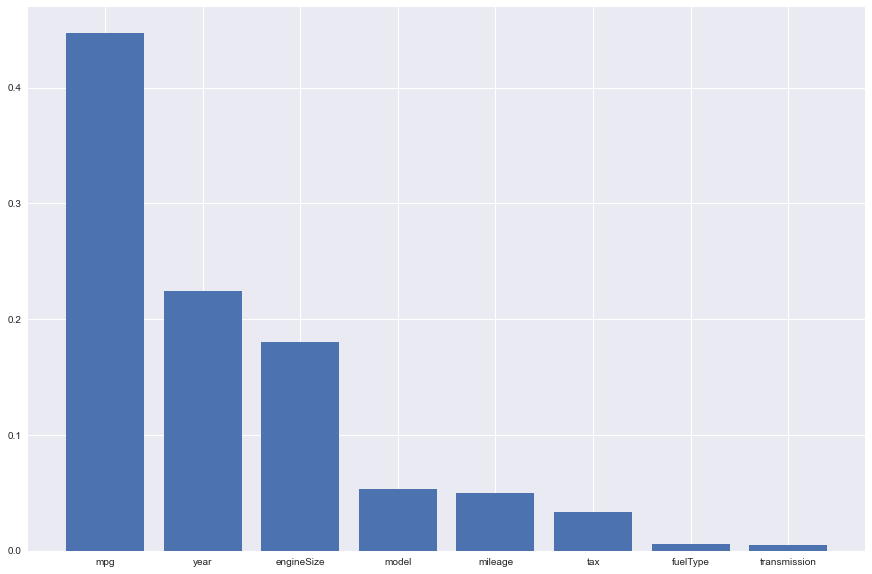

In [32]:
#Visualizing features importances of each columns.
def feature_imp(columns,importances, n=30):
    
    df = pd.DataFrame({"features" : columns,
                       "feature_importances" : importances}).sort_values("feature_importances", ascending = False)
    
    plt.figure(figsize = (15,10))
    plt.bar(df["features"], df["feature_importances"])
    
    
feature_imp(x_train.columns,model.feature_importances_)    

* As we can see mpg, year, and engine size are the top 3 things, which contribute more in prediction.
* Based on this we can say that people mostly focused on mpg and engine size when they are going to buy a new Audi car.